In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency

In [25]:
# Load the dataset
data = pd.read_csv('customer_data.csv')
data

,CustomerID,PurchaseAmount,PurchaseDate,ProductCategory
0,48,466.059880,2023-01-14,Books
1,36,67.815167,2023-03-07,Clothing
2,20,473.744736,2023-01-31,Home & Garden
3,13,437.354495,2023-01-24,Home & Garden
4,19,237.997951,2023-01-21,Books
...,...,...,...,...
145,49,354.311567,2023-03-26,Clothing
146,27,410.565752,2023-01-05,Books
147,28,264.707454,2023-03-20,Electronics
148,2,180.303137,2023-01-13,Books


In [26]:
data.describe()

,CustomerID,PurchaseAmount
count,150.000000,150.000000
mean,24.606667,256.970143
std,14.314257,142.487167
min,1.000000,21.297543
25%,11.000000,141.081699
50%,27.000000,237.436179
75%,36.000000,368.318684
max,49.000000,497.312379


In [27]:
# Data cleaning
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])
data

,CustomerID,PurchaseAmount,PurchaseDate,ProductCategory
0,48,466.059880,2023-01-14,Books
1,36,67.815167,2023-03-07,Clothing
2,20,473.744736,2023-01-31,Home & Garden
3,13,437.354495,2023-01-24,Home & Garden
4,19,237.997951,2023-01-21,Books
...,...,...,...,...
145,49,354.311567,2023-03-26,Clothing
146,27,410.565752,2023-01-05,Books
147,28,264.707454,2023-03-20,Electronics
148,2,180.303137,2023-01-13,Books


In [28]:
customer_spending = data.groupby('CustomerID')['PurchaseAmount'].sum().reset_index()
customer_spending

,CustomerID,PurchaseAmount
0,1,1280.750491
1,2,595.892675
2,3,448.571272
3,4,1345.996488
4,5,883.706414
5,6,1109.247925
6,7,1077.307003
7,8,1159.257021
8,9,1148.918170
9,10,419.538389


In [29]:
# Customer Segmentation using K-Means based on each ID's Purchase Amount
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(customer_spending[['PurchaseAmount']].values)
data = data.merge(customer_spending.assign(Segment=clusters), on='CustomerID')
data

C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,PurchaseAmount_x,PurchaseDate,ProductCategory,PurchaseAmount_y,Segment
0,48,466.059880,2023-01-14,Books,607.808292,2
1,48,141.748412,2023-03-23,Electronics,607.808292,2
2,36,67.815167,2023-03-07,Clothing,602.254281,2
3,36,75.432463,2023-01-02,Toys,602.254281,2
4,36,220.393460,2023-02-11,Toys,602.254281,2
...,...,...,...,...,...,...
145,23,168.982796,2023-02-08,Electronics,168.982796,1
146,17,43.371342,2023-01-19,Clothing,351.559616,1
147,17,308.188274,2023-01-06,Clothing,351.559616,1
148,12,375.246812,2023-01-24,Clothing,375.246812,1


In [38]:
# Statistical Analysis - Chi-Square Test
contingency_table = pd.crosstab(data['Segment'], data['ProductCategory'])
contingency_table

ProductCategory,Books,Clothing,Electronics,Home & Garden,Toys
Segment,,,,,
0,13,16,15,15,16
1,4,6,2,5,5
2,10,13,8,10,12


In [39]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-square test result: chi2 = {}, p-value = {}'.format(chi2, p))

Chi-square test result: chi2 = 1.8307570518548217, p-value = 0.9857679263656589


This function performs the Chi-square test of independence. The test is used to determine whether there is a significant association between two categorical variables. In this scenario, it's testing the relationship between customer segments (Segment) and product categories (ProductCategory).

If the p-value is greater than the significance level, it suggests that there is no statistically significant association between the variables, and any observed association in the sample is attributed to random chance.

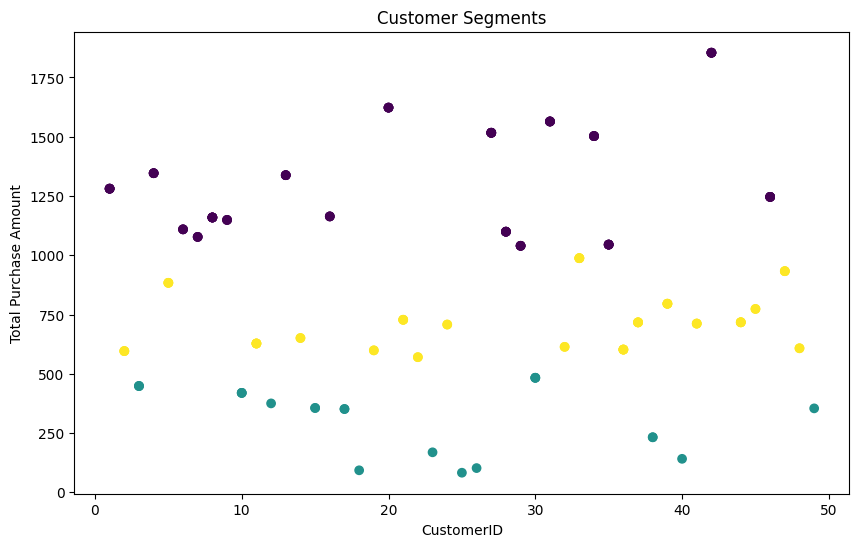

In [31]:
# Data Visualization
plt.figure(figsize=(10, 6))
plt.scatter(data['CustomerID'], data['PurchaseAmount_y'], c=data['Segment'])
plt.title('Customer Segments')
plt.xlabel('CustomerID')
plt.ylabel('Total Purchase Amount')
plt.show()

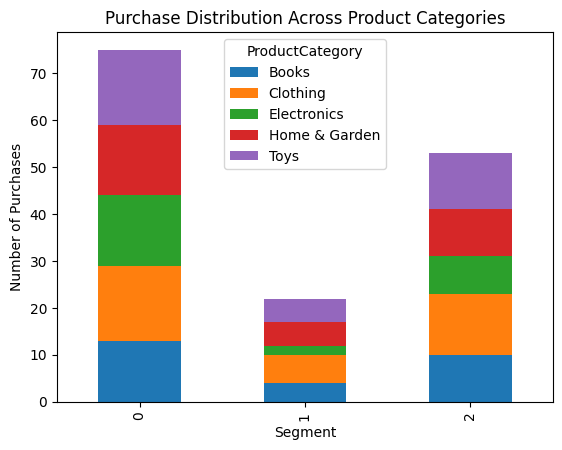

In [32]:
contingency_table.plot(kind='bar', stacked=True)
plt.title('Purchase Distribution Across Product Categories')
plt.xlabel('Segment')
plt.ylabel('Number of Purchases')
plt.show()